In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df=pd.read_csv("C:\\Users\\Mehak\\Downloads\\ObesityDataSet_raw_and_data_sinthetic.csv")


In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
X = df.drop(columns=['NObeyesdad']) 
y = df['NObeyesdad']  

In [ ]:

numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]  

#normalizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}


In [ ]:
for name, model in models.items():
    print(f'\n{name} Results:')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:\n', classification_report(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.8842
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.90      1.00      0.95        54
      Normal_Weight       0.92      0.79      0.85        58
     Obesity_Type_I       0.94      0.96      0.95        70
    Obesity_Type_II       0.97      0.98      0.98        60
   Obesity_Type_III       0.97      1.00      0.98        65
 Overweight_Level_I       0.68      0.78      0.73        58
Overweight_Level_II       0.79      0.66      0.72        58

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.89      0.88      0.88       423


K-Nearest Neighbors Results:
Accuracy: 0.8203
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.70      0.93      0.80        54
      Normal_Weight       0.73      0.52      0.61        58


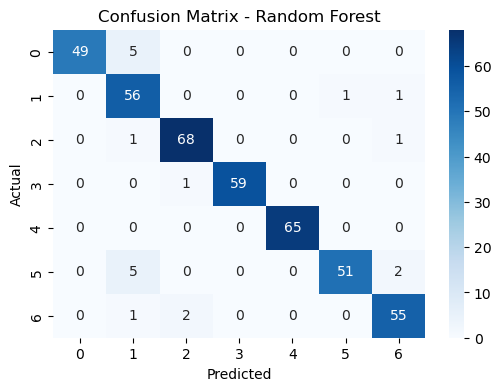

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {name}')
plt.show()


In [ ]:
sample_input = {
    "Age": 22,
    "Gender": "Female",
    "Height": 1.65,
    "Weight": 68,
    "FAVC": "yes",
    "FCVC": 3,
    "NCP": 3,
    "CAEC": "Sometimes",
    "SMOKE": "no",
    "CH2O": 2,
    "SCC": "no",
    "FAF": 2,
    "TUE": 3,
    "CALC": "no",
    "MTRANS": "Public_Transportation",
    "family_history_with_overweight": "yes"
}


In [ ]:
import pandas as pd
sample_df = pd.DataFrame([sample_input])

In [ ]:

sample_scaled = scaler.transform(sample_df)

In [ ]:
prediction = model.predict(sample_scaled)
print("Predicted Obesity Category:", prediction[0])
